In [179]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-fly.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

season = 14
# df = df[df['season'] == season]
len(df)

60209

In [180]:
df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"),"pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"),"batter_vibes"] = 0

for attr in ['batter_buoyancy', 'batter_divinity', 'batter_martyrdom', 'batter_moxie', 'batter_musclitude', 'batter_patheticism', 'batter_thwackability', 'batter_tragicness', 'batter_coldness', 'batter_overpowerment', 'batter_ruthlessness', 'batter_shakespearianism', 'batter_suppression', 'batter_unthwackability', 'batter_base_thirst', 'batter_continuation', 'batter_ground_friction', 'batter_indulgence', 'batter_laserlikeness', 'batter_anticapitalism', 'batter_chasiness', 'batter_omniscience', 'batter_tenaciousness', 'batter_watchfulness', 'batter_pressurization', 'batter_cinnamon']:
    df[attr] = df[attr] * df['batter_multiplier']
    df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['batter_vibes'])
for attr in ['pitcher_buoyancy', 'pitcher_divinity', 'pitcher_martyrdom', 'pitcher_moxie', 'pitcher_musclitude', 'pitcher_patheticism', 'pitcher_thwackability', 'pitcher_tragicness', 'pitcher_ruthlessness', 'pitcher_overpowerment', 'pitcher_unthwackability', 'pitcher_shakespearianism', 'pitcher_suppression', 'pitcher_coldness', 'pitcher_base_thirst', 'pitcher_continuation', 'pitcher_ground_friction', 'pitcher_indulgence', 'pitcher_laserlikeness', 'pitcher_anticapitalism', 'pitcher_chasiness', 'pitcher_omniscience', 'pitcher_tenaciousness', 'pitcher_watchfulness', 'pitcher_pressurization', 'pitcher_cinnamon']:
    df[attr] = df[attr] * df['pitcher_multiplier']
    df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['pitcher_vibes'])
df['batter_suppression_with_pitcher_vibe'] = df['batter_suppression'] * (1 + 0.2 * df['pitcher_vibes'])

for attr in ['defense_avg_anticapitalism', 'defense_avg_chasiness', 'defense_avg_omniscience', 'defense_avg_tenaciousness', 'defense_avg_watchfulness']:
    df[attr + '_times_vibe'] = df[attr] * df['defender_vibes']
    df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['defender_vibes'])


/tmp/ipykernel_217700/414621583.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['pitcher_vibes'])
/tmp/ipykernel_217700/414621583.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['pitcher_vibes'])
/tmp/ipykernel_217700/414621583.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

In [181]:
dfc = df.copy()
# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING"]:
 dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]

# dfc = dfc[dfc['roll'] < 0.7]
# dfc = dfc[dfc['roll'] > 0.2]
dfc = dfc[(dfc['pitcher_multiplier'] == 1) & (dfc['batter_multiplier'] == 1)]
# dfc = dfc[(dfc['pitcher_vibes'].abs() < 0.2) & (dfc['batter_vibes'].abs() < 0.2)]
# for limit_attr in ['batter_patheticism', 'batter_thwackability', 'batter_divinity', 'batter_musclitude', 'pitcher_ruthlessness']:
#     dfc = dfc[(dfc[limit_attr] > 0.1) & (dfc[limit_attr] < 0.9)]
# dfc = dfc[dfc['batter_thwackability'] + dfc['batter_musclitude'] + dfc['batter_divinity'] > dfc['batter_patheticism']]

len(dfc)

38176

In [182]:
# dfc.corr()['offset'].sort_values()

In [183]:
X = dfc[['roll', 'passed',
 'batter_buoyancy_with_vibe',
'batter_suppression_with_vibe',
 # 'batter_suppression_with_pitcher_vibe',
# 'batter_tragicness_with_vibe',
# 'pitcher_watchfulness_with_vibe',
]]
# X = X[X['roll'] < 0.85]

# X = dfc[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = dfc[['roll', 'pitcher_ruthlessness']]
y = X['passed']
X = X.drop('passed', axis=1)

In [184]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

trainedsvm = svm.LinearSVC(intercept_scaling=100, dual=False, max_iter=100000, C=1000, class_weight='balanced').fit(X2, y)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y,predictionsvm))
print(classification_report(y,predictionsvm))
print(trainedsvm.score(X2, y))

[[26811   375]
 [   84 10906]]
              precision    recall  f1-score   support

       False       1.00      0.99      0.99     27186
        True       0.97      0.99      0.98     10990

    accuracy                           0.99     38176
   macro avg       0.98      0.99      0.99     38176
weighted avg       0.99      0.99      0.99     38176

0.9879767393126572


In [185]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
print(intercept_scaled)
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[-0.19560794]


[(1.0, 'roll'),
 (-0.2916684741351411, 'batter_buoyancy_with_vibe'),
 (0.16324565924621162, 'batter_suppression_with_vibe')]

[0.19560794]
(0.2916684741351411, 'batter_buoyancy_with_vibe')
(-0.16324565924621162, 'batter_suppression_with_vibe')


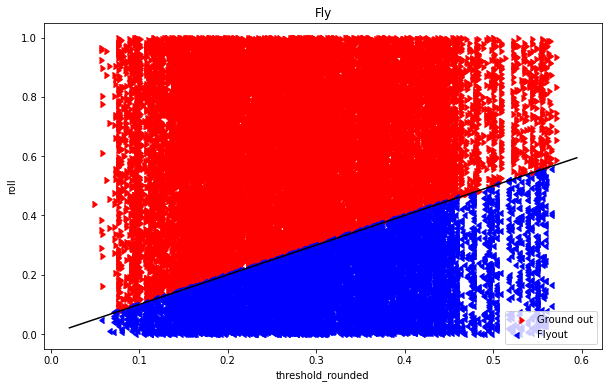

In [186]:
dfc['threshold_rounded'] = 0.18-(
     -0.3 * dfc['batter_buoyancy']
     +0.16 * dfc['batter_suppression']
     +0.1 * (dfc['ballpark_ominousness'] - 0.5)
)

dfc['threshold'] = -intercept_scaled[0]
print(-intercept_scaled)
for pair in zip(-np.array(coef_list), X.columns):
    if pair[1] != "roll":
        print(pair)
        dfc['threshold'] += pair[0] * dfc[pair[1]]

# x_val = "day"
x_val = "threshold_rounded"
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.scatter(dfc[~dfc['passed']][x_val], dfc[~dfc['passed']]["roll"], color="red",
           label="Ground out", marker=CARETRIGHTBASE)
ax.scatter(dfc[dfc['passed']][x_val], dfc[dfc['passed']]["roll"], color="blue",
           label="Flyout", marker=CARETLEFTBASE)
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
ax.set_title("Fly")
# ax.set_xlim(0.484, 0.499)

ax.plot(ax.get_xlim(), ax.get_xlim(), 'k')

ax.legend()

0


,offset,roll,threshold,event_type,top_of_inning,inning,event_type,batter_vibes,pitcher_vibes,ballpark_viscosity,batter_musclitude,batter_name,pitcher_name,batter_mods,pitcher_mods,batting_team_mods,pitching_team_mods,day,game_id,play_count


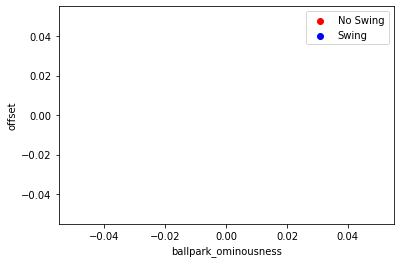

In [187]:
dfc["offset"] = dfc["roll"] - dfc["threshold_rounded"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]

fig, ax = plt.subplots(1)
x_val = "ballpark_ominousness"
ax.scatter(outliers[~outliers['passed']][x_val], outliers[~outliers['passed']]["offset"], color="red", label="No Swing")
ax.scatter(outliers[outliers['passed']][x_val], outliers[outliers['passed']]["offset"], color="blue", label="Swing")
ax.set_xlabel(x_val)
ax.set_ylabel('offset')
ax.legend()

table = outliers
print(len(table))
table[["offset", "roll", "threshold", "event_type", "top_of_inning", "inning",
       "event_type", "batter_vibes", "pitcher_vibes",
       "ballpark_viscosity", "batter_musclitude",
       "batter_name", "pitcher_name", "batter_mods", "pitcher_mods",
       "batting_team_mods", "pitching_team_mods", "day",  "game_id", "play_count"]].sort_values('offset', ascending=False)
# len(table)

In [188]:
list(df.columns)

['Unnamed: 0',
 'event_type',
 'roll',
 'passed',
 'batter_buoyancy',
 'batter_divinity',
 'batter_martyrdom',
 'batter_moxie',
 'batter_musclitude',
 'batter_patheticism',
 'batter_thwackability',
 'batter_tragicness',
 'batter_coldness',
 'batter_overpowerment',
 'batter_ruthlessness',
 'batter_shakespearianism',
 'batter_suppression',
 'batter_unthwackability',
 'batter_base_thirst',
 'batter_continuation',
 'batter_ground_friction',
 'batter_indulgence',
 'batter_laserlikeness',
 'batter_anticapitalism',
 'batter_chasiness',
 'batter_omniscience',
 'batter_tenaciousness',
 'batter_watchfulness',
 'batter_pressurization',
 'batter_cinnamon',
 'batter_multiplier',
 'pitcher_buoyancy',
 'pitcher_divinity',
 'pitcher_martyrdom',
 'pitcher_moxie',
 'pitcher_musclitude',
 'pitcher_patheticism',
 'pitcher_thwackability',
 'pitcher_tragicness',
 'pitcher_ruthlessness',
 'pitcher_overpowerment',
 'pitcher_unthwackability',
 'pitcher_shakespearianism',
 'pitcher_suppression',
 'pitcher_coldn